In [1]:
import numpy as np
import pandas as pd
from tensorflow import set_random_seed

set_random_seed(0)
np.random.seed(0)

In [2]:
df_train = pd.read_csv('./fashion-mnist_train.csv')
# 0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot


In [3]:
df_test = pd.read_csv('./fashion-mnist_test.csv')

In [4]:
X_train = df_train.drop('label', axis=1).values
y_train = df_train['label'].values

X_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

num_classes = 10

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
# Разбиение на обучающую и валидационную выборки.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 42)

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_valid = tf.keras.utils.to_categorical(y_valid)

# 1. Логистическая регрессия

In [8]:
def logistic_regression():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax', input_shape=(784,)))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [9]:
tensor_board = tf.keras.callbacks.TensorBoard(
    log_dir='./logs/task01', histogram_freq=0, write_graph=True, write_images=True)

model = logistic_regression()
_ = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=0, 
    validation_data=(X_valid, y_valid),
    callbacks=[tensor_board]
)

# val_acc = model.history.history['val_acc']
# pd.DataFrame(val_acc).to_csv("task1_lr_plot.csv", mode='w+', index=True, index_label='Step', header=['Value'])

In [10]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) 

In [11]:
print ('1. Логистическая регрессия')
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1. Логистическая регрессия
Test loss: 0.453147798252
Test accuracy: 0.8471


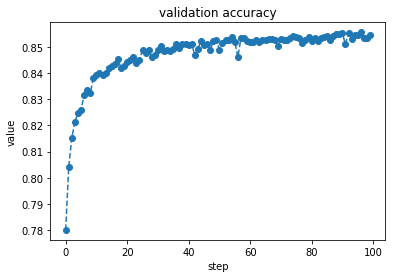

In [1]:
# tensorboard  --logdir /logs/task01

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

df = pd.read_csv('task1_lr_plot.csv')
x, y = df[['Step']].values, df[['Value']].values
plt.title('validation accuracy')
plt.xlabel('step')
plt.ylabel('value')
plt.plot(x, y, '--o')
plt.show()

# 2. Полносвязная нейронная сеть

In [12]:
def dense_neural_network():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))    
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [14]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'task2_dnn.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')

tensor_board = tf.keras.callbacks.TensorBoard(
    log_dir='./logs/task02', histogram_freq=0, write_graph=True, write_images=True)

model = dense_neural_network()
_ = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[model_checkpoint, tensor_board]
)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 8s 183us/step - loss: 0.5388 - acc: 0.8102 - val_loss: 0.4266 - val_acc: 0.8485
Epoch 2/20
45000/45000 [==============================] - 8s 179us/step - loss: 0.3993 - acc: 0.8564 - val_loss: 0.3751 - val_acc: 0.8637
Epoch 3/20
45000/45000 [==============================] - 7s 162us/step - loss: 0.3626 - acc: 0.8691 - val_loss: 0.3674 - val_acc: 0.8678
Epoch 4/20
45000/45000 [==============================] - 7s 162us/step - loss: 0.3320 - acc: 0.8795 - val_loss: 0.3502 - val_acc: 0.8738
Epoch 5/20
45000/45000 [==============================] - 7s 162us/step - loss: 0.3120 - acc: 0.8843 - val_loss: 0.3648 - val_acc: 0.8674
Epoch 6/20
45000/45000 [==============================] - 7s 157us/step - loss: 0.2973 - acc: 0.8905 - val_loss: 0.3571 - val_acc: 0.8663
Epoch 7/20
45000/45000 [==============================] - 7s 153us/step - loss: 0.2824 - acc: 0.8961 - val_loss: 0.3540 - 

In [15]:
model.load_weights('task2_dnn.h5')
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [16]:
print ('2. Полносвязная нейронная сеть')
print('Test loss:', loss)
print('Test accuracy:', accuracy)

2. Полносвязная нейронная сеть
('Test loss:', 0.35848056923151017)
('Test accuracy:', 0.8869)


Полносвязная нейронная сеть показывает лучший результат в решении задачи классификации по сравнению с логистической регрессией

# 3. Сверточная нейронная сеть

In [17]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
def conv_neural_network():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=(3,3), input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [19]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'task3_cnn_1.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')

tensor_board = tf.keras.callbacks.TensorBoard(
    log_dir='./logs/task03_1', histogram_freq=0, write_graph=True, write_images=True)

model = conv_neural_network()
_ = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[model_checkpoint, tensor_board]
)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 21s 458us/step - loss: 0.5124 - acc: 0.8140 - val_loss: 0.3817 - val_acc: 0.8625
Epoch 2/20
45000/45000 [==============================] - 21s 462us/step - loss: 0.3362 - acc: 0.8779 - val_loss: 0.3096 - val_acc: 0.8871
Epoch 3/20
45000/45000 [==============================] - 20s 453us/step - loss: 0.2866 - acc: 0.8942 - val_loss: 0.2884 - val_acc: 0.8968
Epoch 4/20
45000/45000 [==============================] - 20s 438us/step - loss: 0.2537 - acc: 0.9069 - val_loss: 0.2731 - val_acc: 0.9004
Epoch 5/20
45000/45000 [==============================] - 20s 438us/step - loss: 0.2235 - acc: 0.9166 - val_loss: 0.2631 - val_acc: 0.9063
Epoch 6/20
45000/45000 [==============================] - 20s 447us/step - loss: 0.1997 - acc: 0.9258 - val_loss: 0.2788 - val_acc: 0.8972
Epoch 7/20
45000/45000 [==============================] - 20s 450us/step - loss: 0.1766 - acc: 0.9343 - val_loss: 0.

In [20]:
model.load_weights('task3_cnn_1.h5')
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [21]:
print ('3. Сверточная нейронная сеть (2)')
print('Test loss:', loss)
print('Test accuracy:', accuracy)

3. Сверточная нейронная сеть (2)
('Test loss:', 0.26253825799822805)
('Test accuracy:', 0.9136)


Качество сверточной модели немного лучше по сравнению с полносвязной нейронной сетью 

In [22]:
def conv_neural_network_2():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(28,28,1)))
    model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [23]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'task3_cnn_2.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')

tensor_board = tf.keras.callbacks.TensorBoard(
    log_dir='./logs/task03_2', histogram_freq=0, write_graph=True, write_images=True)

model = conv_neural_network_2()
_ = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[model_checkpoint, tensor_board]
)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 40s 891us/step - loss: 0.5396 - acc: 0.8044 - val_loss: 0.3587 - val_acc: 0.8703
Epoch 2/20
45000/45000 [==============================] - 38s 851us/step - loss: 0.3218 - acc: 0.8821 - val_loss: 0.3092 - val_acc: 0.8900
Epoch 3/20
45000/45000 [==============================] - 39s 864us/step - loss: 0.2688 - acc: 0.9008 - val_loss: 0.2723 - val_acc: 0.9053
Epoch 4/20
45000/45000 [==============================] - 44s 968us/step - loss: 0.2325 - acc: 0.9136 - val_loss: 0.2933 - val_acc: 0.8972
Epoch 5/20
45000/45000 [==============================] - 41s 918us/step - loss: 0.2087 - acc: 0.9229 - val_loss: 0.2603 - val_acc: 0.9061
Epoch 6/20
45000/45000 [==============================] - 38s 856us/step - loss: 0.1833 - acc: 0.9323 - val_loss: 0.2510 - val_acc: 0.9141
Epoch 7/20
45000/45000 [==============================] - 39s 861us/step - loss: 0.1631 - acc: 0.9392 - val_loss: 0.

In [24]:
model.load_weights('task3_cnn_2.h5')
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [25]:
print ('3. Сверточная нейронная сеть (3)')
print('Test loss:', loss)
print('Test accuracy:', accuracy)

3. Сверточная нейронная сеть (3)
('Test loss:', 0.2998824502505362)
('Test accuracy:', 0.9157)


Качество модели с дополнительными сверточными слоями несколько улучшилось

In [29]:
def conv_neural_network_3():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(28,28,1)))
    model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=(3,3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [30]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'task3_cnn_3.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')

tensor_board = tf.keras.callbacks.TensorBoard(
    log_dir='./logs/task03_3', histogram_freq=0, write_graph=True, write_images=True)

model = conv_neural_network_3()
_ = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[model_checkpoint, tensor_board]
)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 64s 1ms/step - loss: 0.4094 - acc: 0.8527 - val_loss: 0.3254 - val_acc: 0.8833
Epoch 2/20
45000/45000 [==============================] - 63s 1ms/step - loss: 0.2713 - acc: 0.9007 - val_loss: 0.3174 - val_acc: 0.8891
Epoch 3/20
45000/45000 [==============================] - 64s 1ms/step - loss: 0.2322 - acc: 0.9156 - val_loss: 0.2573 - val_acc: 0.9081
Epoch 4/20
45000/45000 [==============================] - 63s 1ms/step - loss: 0.2024 - acc: 0.9251 - val_loss: 0.2560 - val_acc: 0.9117
Epoch 5/20
45000/45000 [==============================] - 63s 1ms/step - loss: 0.1794 - acc: 0.9332 - val_loss: 0.2584 - val_acc: 0.9099
Epoch 6/20
45000/45000 [==============================] - 63s 1ms/step - loss: 0.1549 - acc: 0.9429 - val_loss: 0.3227 - val_acc: 0.8962
Epoch 7/20
45000/45000 [==============================] - 63s 1ms/step - loss: 0.1353 - acc: 0.9494 - val_loss: 0.2777 - val_acc

In [31]:
model.load_weights('task3_cnn_3.h5')
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [32]:
print ('3. Сверточная нейронная сеть (+BatchNormalization)')
print('Test loss:', loss)
print('Test accuracy:', accuracy)

3. Сверточная нейронная сеть (+BatchNormalization)
('Test loss:', 0.344912329170201)
('Test accuracy:', 0.9265)


Добавление BatchNormalization после сверточных слоев улучшило качество модели